In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import os

In [3]:
os.environ['KAGGLE_USERNAME'] = 'bluebear78'
os.environ['KAGGLE_KEY'] = '39d305f791ce074d3a7f8d5630fecba2'

In [4]:
!rm -f "*.*"
!kaggle datasets download -d mathurinache/world-happiness-report


  0% 0.00/67.4k [00:00<?, ?B/s]
100% 67.4k/67.4k [00:00<00:00, 24.5MB/s]
UnZip 6.00 of 20 April 2009, by Debian. Original by Info-ZIP.

Usage: unzip [-Z] [-opts[modifiers]] file[.zip] [list] [-x xlist] [-d exdir]
  Default action is to extract files in list, except those in xlist, to exdir;
  file[.zip] may be a wildcard.  -Z => ZipInfo mode ("unzip -Z" for usage).

  -p  extract files to pipe, no messages     -l  list files (short format)
  -f  freshen existing files, create none    -t  test compressed archive data
  -u  update files, create if necessary      -z  display archive comment only
  -v  list verbosely/show version info       -T  timestamp archive to latest
  -x  exclude files that follow (in xlist)   -d  extract files into exdir
modifiers:
  -n  never overwrite existing files         -q  quiet mode (-qq => quieter)
  -o  overwrite files WITHOUT prompting      -a  auto-convert any text files
  -j  junk paths (do not make directories)   -aa treat ALL files as text
  -U  use e

In [5]:
!unzip "*.zip"

Archive:  world-happiness-report.zip
  inflating: 2015.csv                
  inflating: 2016.csv                
  inflating: 2017.csv                
  inflating: 2018.csv                
  inflating: 2019.csv                
  inflating: 2020.csv                
  inflating: 2021.csv                
  inflating: 2022.csv                


In [19]:
df = dict()
df['2015'] = pd.read_csv('2015.csv')
df['2016'] = pd.read_csv('2016.csv')
df['2017'] = pd.read_csv('2017.csv')
df['2018'] = pd.read_csv('2018.csv')
df['2019'] = pd.read_csv('2019.csv')
df['2020'] = pd.read_csv('2020.csv')
df['2021'] = pd.read_csv('2021.csv')

2022는 데이터가 부족하므로 처리하지 않음

In [20]:
for key in df:
  print(key,df[key].columns)

2015 Index(['Country', 'Region', 'Happiness Rank', 'Happiness Score',
       'Standard Error', 'Economy (GDP per Capita)', 'Family',
       'Health (Life Expectancy)', 'Freedom', 'Trust (Government Corruption)',
       'Generosity', 'Dystopia Residual'],
      dtype='object')
2016 Index(['Country', 'Region', 'Happiness Rank', 'Happiness Score',
       'Lower Confidence Interval', 'Upper Confidence Interval',
       'Economy (GDP per Capita)', 'Family', 'Health (Life Expectancy)',
       'Freedom', 'Trust (Government Corruption)', 'Generosity',
       'Dystopia Residual'],
      dtype='object')
2017 Index(['Country', 'Happiness.Rank', 'Happiness.Score', 'Whisker.high',
       'Whisker.low', 'Economy..GDP.per.Capita.', 'Family',
       'Health..Life.Expectancy.', 'Freedom', 'Generosity',
       'Trust..Government.Corruption.', 'Dystopia.Residual'],
      dtype='object')
2018 Index(['Overall rank', 'Country or region', 'Score', 'GDP per capita',
       'Social support', 'Healthy life expe

각 columns들이 연도별로 다름

데이터 형태 파악하기

데이터를 보면 총 12개의 열로 구성되어 있다.
147개의 행으로 이루어졌다.(148개의 나라를 조사함.)
RANK:가장 높은 행복도를 띄는 나라 순으로 정렬 했음.
RANK, Country 빼고 결측치가 하나씩있음.
RANK 빼고 다 dtype이 object이다.
RANK는 Id와 같다.(삭제할 대상)
Columns 의미파악

Country
국가이름
Happiness score
행복 점수
Q."가장 행복한 10을 기준으로 0에서 10까지의 척도로 자신의 행복을 어떻게 평가하시겠습니까?"
Whisker-high
행복 점수의 낮은 신뢰 구간
Whisker-low
행복 점수의 상위 신뢰 구간
Dystopia (1.83) + residual
Dystopia Residual이 행복 지수 계산에 기여한 정도
유토피아와 반대되는 공동체 또는 사회를 가리키는 말
Explained by: GDP per capita
경제
1인당 GDP
GDP가 행복지수 계산에 기여하는 정도
Explained by: Social support
사회적 지원
Explained by: Healthy life expectancy
건강
기대수명
기대수명이 행복지수 계산에 기여한 정도
Explained by: Freedom to make life choices
자유
자유가 행복지수 계산에 기여한 정도
Explained by: Generosity
관대함
너그러움이 행복지수 계산에 기여한 정도
Explained by: Perceptions of corruption
정부 부패
신뢰
부패에 대한 인식이 행복 지수에 기여하는 정도

In [22]:
df['2015'].drop(['Region', 'Happiness Rank','Standard Error'],axis=1,inplace=True)
df['2016'].drop([ 'Region', 'Happiness Rank','Lower Confidence Interval', 'Upper Confidence Interval'],axis=1,inplace=True)
df['2017'].drop([ 'Happiness.Rank', 'Whisker.high','Whisker.low'],axis=1,inplace=True)
df['2018'].drop(['Overall rank'],axis=1,inplace=True)# residual이 없음 generiosity 순서가 다름
df['2019'].drop(['Overall rank'],axis=1,inplace=True)
df['2020'].drop(['Regional indicator', 'Standard error of ladder score', 'upperwhisker', 'lowerwhisker','Logged GDP per capita', 'Social support', 'Healthy life expectancy','Freedom to make life choices', 'Generosity', 'Perceptions of corruption', 'Ladder score in Dystopia'],axis=1,inplace=True)
df['2021'].drop([ 'Regional indicator', 'Standard error of ladder score', 'upperwhisker', 'lowerwhisker','Logged GDP per capita', 'Social support', 'Healthy life expectancy','Freedom to make life choices', 'Generosity','Perceptions of corruption', 'Ladder score in Dystopia'],axis=1,inplace=True)

In [24]:
df['2018'].columns

Index(['Country or region', 'Score', 'GDP per capita', 'Social support',
       'Healthy life expectancy', 'Freedom to make life choices', 'Generosity',
       'Perceptions of corruption'],
      dtype='object')

In [25]:
df['2018']['residual'] = df['2018']['Score'] - df['2018'][[ 'GDP per capita', 'Social support',
       'Healthy life expectancy', 'Freedom to make life choices', 'Generosity',
       'Perceptions of corruption']].sum(axis=1) # row를 다 더해주는거
df['2019']['residual'] = df['2018']['Score'] - df['2018'][[ 'GDP per capita', 'Social support',
       'Healthy life expectancy', 'Freedom to make life choices', 'Generosity',
       'Perceptions of corruption']].sum(axis=1) # row를 다 더해주는거

residual은 score에서 나머지 수치값들 다 빼준거

In [32]:
df['2015'].columns

Index(['Country', 'Happiness Score', 'Economy (GDP per Capita)', 'Family',
       'Health (Life Expectancy)', 'Freedom', 'Trust (Government Corruption)',
       'Generosity', 'Dystopia Residual'],
      dtype='object')

In [40]:
df['2016'].columns

Index(['Country', 'Happiness Score', 'Economy (GDP per Capita)', 'Family',
       'Health (Life Expectancy)', 'Freedom', 'Trust (Government Corruption)',
       'Generosity', 'Dystopia Residual'],
      dtype='object')

In [39]:
df['2021'].columns

Index(['Country name', 'Ladder score', 'Explained by: Log GDP per capita',
       'Explained by: Social support', 'Explained by: Healthy life expectancy',
       'Explained by: Freedom to make life choices',
       'Explained by: Generosity', 'Explained by: Perceptions of corruption',
       'Dystopia + residual'],
      dtype='object')

In [41]:
df['2015'] = df['2015'][['Country', 'Happiness Score', 'Economy (GDP per Capita)', 'Family',
       'Health (Life Expectancy)', 'Freedom', 'Generosity','Trust (Government Corruption)',
        'Dystopia Residual']]
df['2016'] = df['2016'][['Country', 'Happiness Score', 'Economy (GDP per Capita)', 'Family',
       'Health (Life Expectancy)', 'Freedom','Generosity', 'Trust (Government Corruption)',
        'Dystopia Residual']]

원하는 columns에 맞게 바꿔줌

In [42]:
for key in df:
  print(key,df[key].columns)

2015 Index(['Country', 'Happiness Score', 'Economy (GDP per Capita)', 'Family',
       'Health (Life Expectancy)', 'Freedom', 'Generosity',
       'Trust (Government Corruption)', 'Dystopia Residual'],
      dtype='object')
2016 Index(['Country', 'Happiness Score', 'Economy (GDP per Capita)', 'Family',
       'Health (Life Expectancy)', 'Freedom', 'Generosity',
       'Trust (Government Corruption)', 'Dystopia Residual'],
      dtype='object')
2017 Index(['Country', 'Happiness.Score', 'Economy..GDP.per.Capita.', 'Family',
       'Health..Life.Expectancy.', 'Freedom', 'Generosity',
       'Trust..Government.Corruption.', 'Dystopia.Residual'],
      dtype='object')
2018 Index(['Country or region', 'Score', 'GDP per capita', 'Social support',
       'Healthy life expectancy', 'Freedom to make life choices', 'Generosity',
       'Perceptions of corruption', 'residual'],
      dtype='object')
2019 Index(['Country or region', 'Score', 'GDP per capita', 'Social support',
       'Healthy life 

In [44]:
cols = ['country','score','economy','family','health','freedom','generosity','trust','residual']

In [46]:
for col_name in df:
  df[col_name].columns = cols


In [47]:
for col_name in df:
  print(df[col_name].columns)

Index(['country', 'score', 'economy', 'family', 'health', 'freedom',
       'generosity', 'trust', 'residual'],
      dtype='object')
Index(['country', 'score', 'economy', 'family', 'health', 'freedom',
       'generosity', 'trust', 'residual'],
      dtype='object')
Index(['country', 'score', 'economy', 'family', 'health', 'freedom',
       'generosity', 'trust', 'residual'],
      dtype='object')
Index(['country', 'score', 'economy', 'family', 'health', 'freedom',
       'generosity', 'trust', 'residual'],
      dtype='object')
Index(['country', 'score', 'economy', 'family', 'health', 'freedom',
       'generosity', 'trust', 'residual'],
      dtype='object')
Index(['country', 'score', 'economy', 'family', 'health', 'freedom',
       'generosity', 'trust', 'residual'],
      dtype='object')
Index(['country', 'score', 'economy', 'family', 'health', 'freedom',
       'generosity', 'trust', 'residual'],
      dtype='object')


이름을 통일시켜줌

In [49]:
 df_all =  pd.concat(df,axis=0)
 df_all.index.names = ['year','rank']
 df_all

country  score  economy   family   health  freedom  generosity  \
year rank                                                                       
2015 0     Switzerland  7.587  1.39651  1.34951  0.94143  0.66557     0.29678   
     1         Iceland  7.561  1.30232  1.40223  0.94784  0.62877     0.43630   
     2         Denmark  7.527  1.32548  1.36058  0.87464  0.64938     0.34139   
     3          Norway  7.522  1.45900  1.33095  0.88521  0.66973     0.34699   
     4          Canada  7.427  1.32629  1.32261  0.90563  0.63297     0.45811   
...                ...    ...      ...      ...      ...      ...         ...   
2021 144       Lesotho  3.512  0.45100  0.73100  0.00700  0.40500     0.10300   
     145      Botswana  3.467  1.09900  0.72400  0.34000  0.53900     0.02700   
     146        Rwanda  3.415  0.36400  0.20200  0.40700  0.62700     0.22700   
     147      Zimbabwe  3.145  0.45700  0.64900  0.24300  0.35900     0.15700   
     148   Afghanistan  2.523  0.37000  0.00000  0.12600  0.00000     0.12200   

             trust  residual  
year rank                     
2015 0     0.41978   2.51738  
     1     0.14145   2.70201  
     2     0.48357   2.49204  
     3     0.36503   2.46531  
     4     0.32957   2.45176  
...            ...       ...  
2021 144   0.01500   1.80000  
     145   0.08800   0.64800  
     146   0.49300   1.09500  
     147   0.07500   1.20500  
     148   0.01000   1.89500  

[1084 rows x 9 columns]

dataframe 하나로 합치기

In [51]:
df_all.reset_index(inplace=True)
df_all['rank']+=1
df_all

,year,rank,country,score,economy,family,health,freedom,generosity,trust,residual
0,2015,1,Switzerland,7.587,1.39651,1.34951,0.94143,0.66557,0.29678,0.41978,2.51738
1,2015,2,Iceland,7.561,1.30232,1.40223,0.94784,0.62877,0.43630,0.14145,2.70201
2,2015,3,Denmark,7.527,1.32548,1.36058,0.87464,0.64938,0.34139,0.48357,2.49204
3,2015,4,Norway,7.522,1.45900,1.33095,0.88521,0.66973,0.34699,0.36503,2.46531
4,2015,5,Canada,7.427,1.32629,1.32261,0.90563,0.63297,0.45811,0.32957,2.45176
...,...,...,...,...,...,...,...,...,...,...,...
1079,2021,145,Lesotho,3.512,0.45100,0.73100,0.00700,0.40500,0.10300,0.01500,1.80000
1080,2021,146,Botswana,3.467,1.09900,0.72400,0.34000,0.53900,0.02700,0.08800,0.64800
1081,2021,147,Rwanda,3.415,0.36400,0.20200,0.40700,0.62700,0.22700,0.49300,1.09500
1082,2021,148,Zimbabwe,3.145,0.45700,0.64900,0.24300,0.35900,0.15700,0.07500,1.20500


rank값이 0부터 시작하므로 1씩 증가시킴

In [52]:
rank_table = df_all.pivot(index='country',columns=['year'],values='rank')
rank_table

year,2015,2016,2017,2018,2019,2020,2021
country,,,,,,,
Afghanistan,153.0,154.0,141.0,145.0,154.0,153.0,149.0
Albania,95.0,109.0,109.0,112.0,107.0,105.0,93.0
Algeria,68.0,38.0,53.0,84.0,88.0,100.0,109.0
Angola,137.0,141.0,140.0,142.0,NaN,NaN,NaN
Argentina,30.0,26.0,24.0,29.0,47.0,55.0,57.0
...,...,...,...,...,...,...,...
Venezuela,23.0,44.0,82.0,102.0,108.0,99.0,107.0
Vietnam,75.0,96.0,94.0,95.0,94.0,83.0,79.0
Yemen,136.0,147.0,146.0,152.0,151.0,146.0,141.0


'국가'를 기준으로 연도별 랭킹을 보고싶을때 사용
없는 데이터에 Nan이 있음을 주의

In [60]:
rank_table.sort_values('2021',inplace=True)#value를 이용하여 소팅하는것
rank_table.head(20)

year,2015,2016,2017,2018,2019,2020,2021
country,,,,,,,
Finland,6.0,5.0,5.0,1.0,1.0,1.0,1.0
Denmark,3.0,1.0,2.0,3.0,2.0,2.0,2.0
Switzerland,1.0,2.0,4.0,5.0,6.0,3.0,3.0
Iceland,2.0,3.0,3.0,4.0,4.0,4.0,4.0
Netherlands,7.0,7.0,6.0,6.0,5.0,6.0,5.0
Norway,4.0,4.0,1.0,2.0,3.0,5.0,6.0
Sweden,8.0,10.0,9.0,9.0,7.0,7.0,7.0
Luxembourg,17.0,20.0,18.0,17.0,14.0,10.0,8.0
New Zealand,9.0,8.0,8.0,8.0,8.0,8.0,9.0


2020년 기준으로 행복순위를 table화

In [65]:
fig = plt.figure(figsize=(10,50)) #fig가 상당히 커야하고 데이터별로 넣어야하기때문에 for문 돌려줌
rank2021 = rank_table['2021'].dropna()
for c in rank2021.index:
  t = rank_table.loc[c].dropna()
  plt.plot(t.index,t,'.-') #. 달아주는거

plt.xlim(['2015','2021']) #x축 사이즈 맞추기
plt.ylim([0,rank_table.max().max()+1]) #전체중에 가장 큰 사이즈로 맞추기
plt.yticks(rank2021,rank2021.index)
ax = plt.gca() # 현재 그래프 받아오기
ax.invert_yaxis()#y축을 위아래로 바꾸기
ax.yaxis.set_label_position('right')
ax.yaxis.tick_right()
plt.tight_layout()
plt.show()

Output hidden; open in https://colab.research.google.com to view.

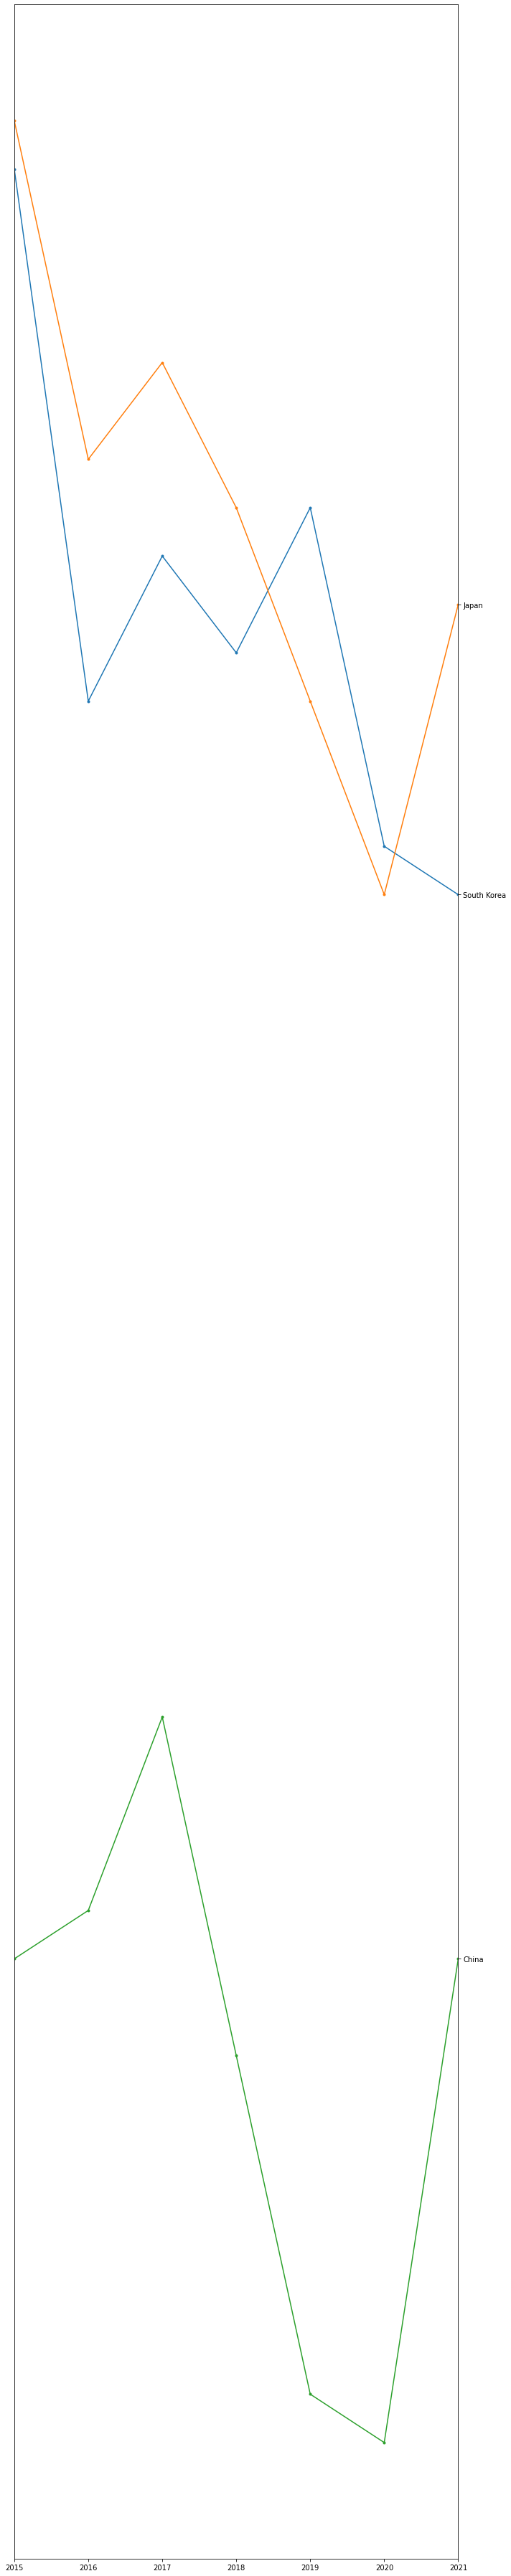

In [81]:
fig = plt.figure(figsize=(10,50)) #fig가 상당히 커야하고 데이터별로 넣어야하기때문에 for문 돌려줌
rank2021_asia = rank_table['2021'][['South Korea','Japan','China']].dropna()
for c in rank2021_asia.index:
  t = rank_table.loc[c].dropna()
  plt.plot(t.index,t,'.-') #. 달아주는거

plt.xlim(['2015','2021']) #x축 사이즈 맞추기
#plt.ylim([0,rank_table['2015'][['South Korea','Japan','China']].max()+1]) #전체중에 가장 큰 사이즈로 맞추기
plt.yticks(rank2021_asia,rank2021_asia.index)
ax = plt.gca() # 현재 그래프 받아오기
ax.invert_yaxis()#y축을 위아래로 바꾸기
ax.yaxis.set_label_position('right')
ax.yaxis.tick_right()
plt.tight_layout()
plt.show()

In [84]:
df_all

,year,rank,country,score,economy,family,health,freedom,generosity,trust,residual
0,2015,1,Switzerland,7.587,1.39651,1.34951,0.94143,0.66557,0.29678,0.41978,2.51738
1,2015,2,Iceland,7.561,1.30232,1.40223,0.94784,0.62877,0.43630,0.14145,2.70201
2,2015,3,Denmark,7.527,1.32548,1.36058,0.87464,0.64938,0.34139,0.48357,2.49204
3,2015,4,Norway,7.522,1.45900,1.33095,0.88521,0.66973,0.34699,0.36503,2.46531
4,2015,5,Canada,7.427,1.32629,1.32261,0.90563,0.63297,0.45811,0.32957,2.45176
...,...,...,...,...,...,...,...,...,...,...,...
1079,2021,145,Lesotho,3.512,0.45100,0.73100,0.00700,0.40500,0.10300,0.01500,1.80000
1080,2021,146,Botswana,3.467,1.09900,0.72400,0.34000,0.53900,0.02700,0.08800,0.64800
1081,2021,147,Rwanda,3.415,0.36400,0.20200,0.40700,0.62700,0.22700,0.49300,1.09500
1082,2021,148,Zimbabwe,3.145,0.45700,0.64900,0.24300,0.35900,0.15700,0.07500,1.20500


In [92]:
data = df_all[df_all['year']=='2021']
data = data.loc[data.index[:20]]
cumsum_data = data[data.columns[4:]].cumsum(axis=1)#값을 누적해서 그래프에 그릴거기때문에
d = cumsum_data[cumsum_data.columns[::-1]]
d['country'] = data['country']

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


,residual,trust,generosity,freedom,health,family,economy,country
935,7.842,4.589,4.108,3.984,3.293,2.552,1.446,Finland
936,7.620,4.752,4.267,4.059,3.373,2.610,1.502,Denmark
937,7.570,4.731,4.318,4.114,3.461,2.645,1.566,Switzerland
938,7.554,4.587,4.417,4.124,3.426,2.654,1.482,Iceland
939,7.464,4.666,4.282,3.980,3.333,2.580,1.501,Netherlands
940,7.392,4.812,4.385,4.136,3.433,2.651,1.543,Norway
941,7.363,4.680,4.232,3.988,3.303,2.540,1.478,Sweden
942,7.325,4.672,4.319,4.153,3.514,2.754,1.751,Luxembourg
943,7.277,4.665,4.220,3.944,3.279,2.494,1.400,New Zealand
944,7.267,4.483,4.191,3.976,3.336,2.554,1.492,Austria


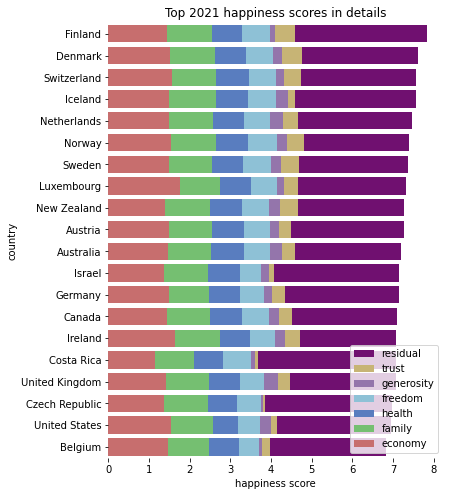

In [103]:
flt = plt.figure(figsize=(6,8))

sns.set_color_codes("muted")
colors = ['r','g','b','c','m','y','purple'][::-1]
for idx,c in enumerate(d.columns[:-1]):
  sns.barplot(x=c,y='country',data=d,label=c,color=colors[idx])

plt.legend(loc='lower right')
plt.title("Top 2021 happiness scores in details")
plt.xlabel('happiness score')
sns.despine(left=True,bottom=True) #옆에 프레임 없애기
plt.show()

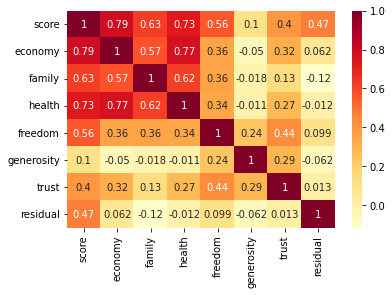

In [107]:
sns.heatmap(df_all.drop('rank',axis=1).corr(),annot=True,cmap='YlOrRd')

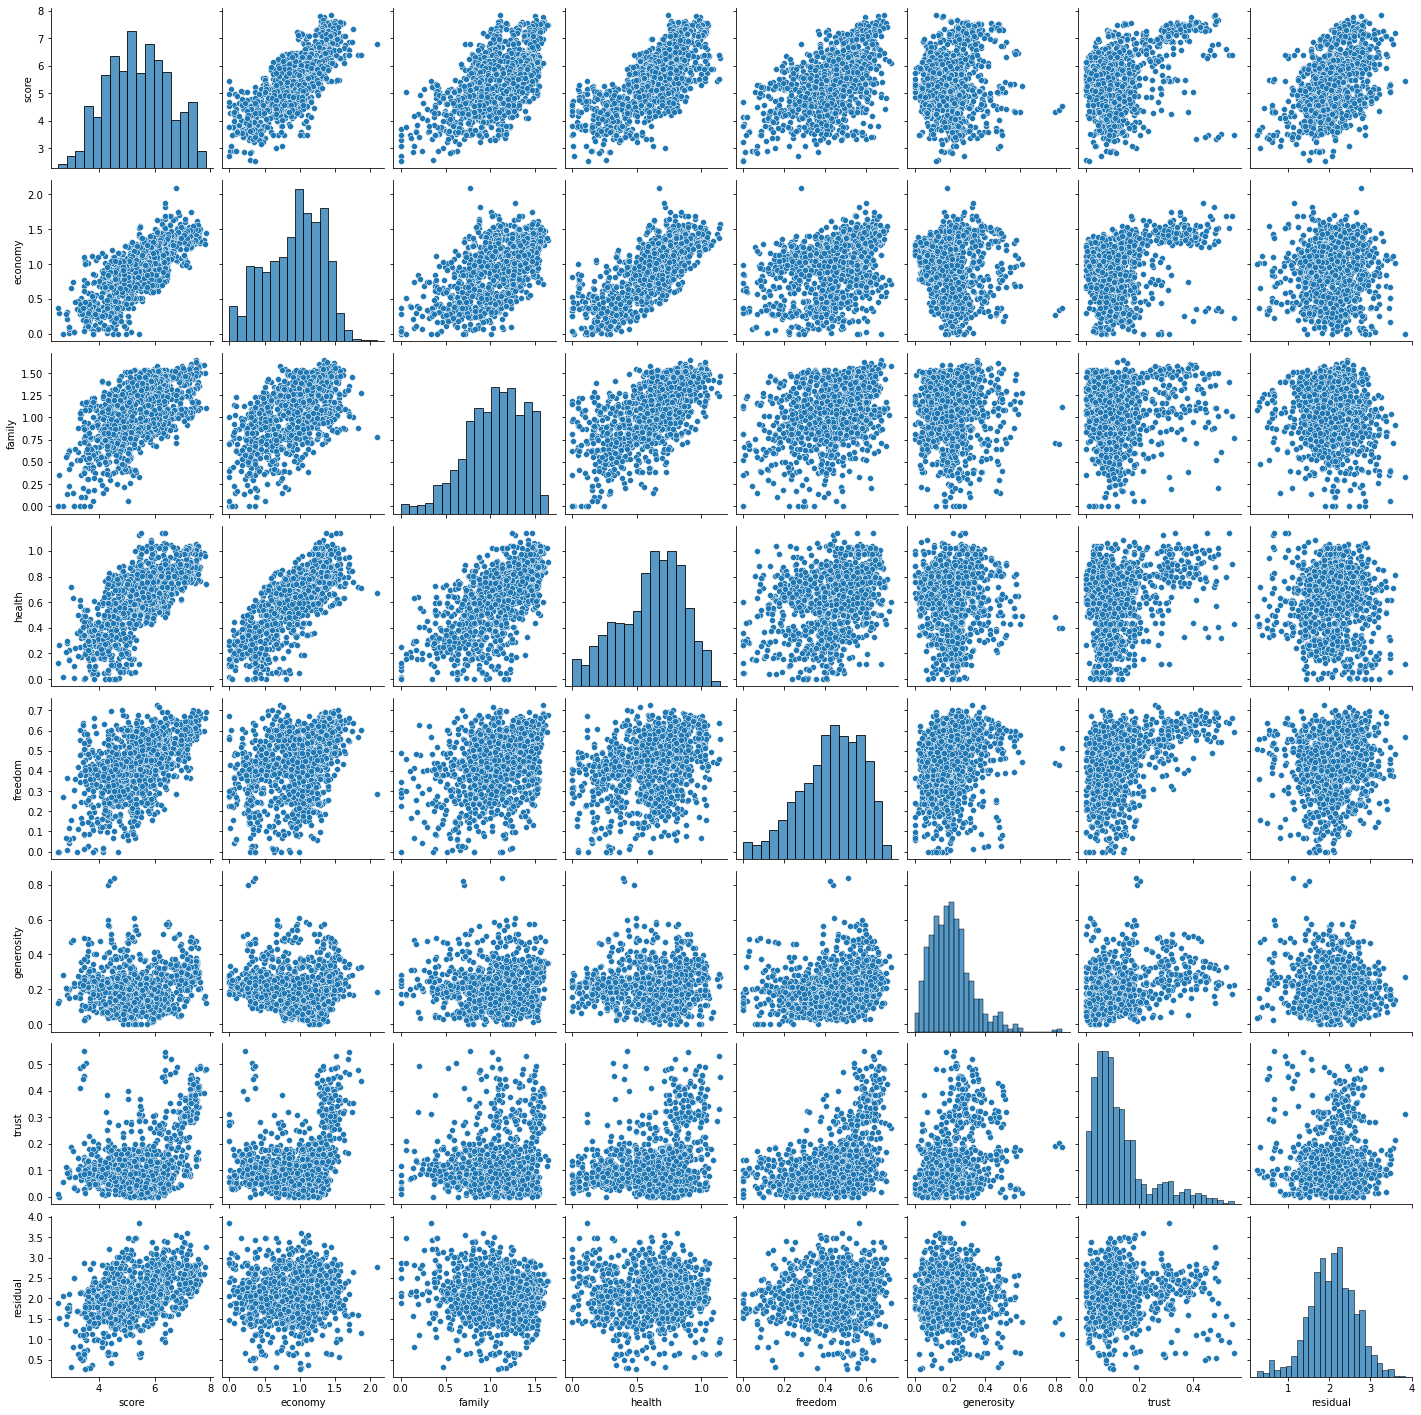

In [108]:
sns.pairplot(df_all.drop(['rank'],axis=1))

In [110]:
col_ionput_list = ['economy','family','health','freedom','generosity','trust']
col_out = 'score'

In [112]:
df_train = df_all[df_all['year']!='2021']
df_test = df_all[df_all['year'] == '2021']

x_train = df_train[col_ionput_list]
y_train = df_train[col_out]
x_test = df_test[col_ionput_list]
y_test = df_test[col_out]

In [118]:
x_train.fillna(0,inplace=True)

In [114]:
from sklearn.preprocessing import StandardScaler

In [115]:
sclaer = StandardScaler()
sclaer.fit(x_train)

StandardScaler()

In [116]:
x_norm = sclaer.transform(x_train)
x_train = pd.DataFrame(x_norm,index=x_train.index,columns=x_train.columns)

x_norm = sclaer.transform(x_test)
x_test = pd.DataFrame(x_norm,index=x_test.index,columns=x_test.columns)

test에도 scaler적용해줘야함

In [119]:
from sklearn.linear_model import LinearRegression

In [120]:
model_lr = LinearRegression()
model_lr.fit(x_train,y_train)

LinearRegression()

In [121]:
from sklearn.metrics import mean_absolute_error,mean_squared_error
from math import sqrt

In [123]:
pred = model_lr.predict(x_test)
print(mean_absolute_error(y_test,pred))
print(sqrt(mean_squared_error(y_test,pred)))

0.48837815897250064
0.5966238598329857


평균 제곱 오차(MSE)는 회귀에서 자주 사용되는 손실 함수이다.
정확도 개념은 회귀에 적용되지 않는다.
일반적인 회귀 지표는 평균 절대 오차(MAE)이다.

MSE는 손실함수로써 쓰이고 MAE는 회귀지표로써 사용된다.

In [124]:
from xgboost import XGBRegressor

In [125]:
model_xgb = XGBRegressor()
model_xgb.fit(x_train,y_train)

[16:26:45] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor()

In [126]:
pred = model_xgb.predict(x_test)
print(mean_absolute_error(y_test,pred))
print(sqrt(mean_squared_error(y_test,pred)))

0.4540160053048357
0.570779860986145


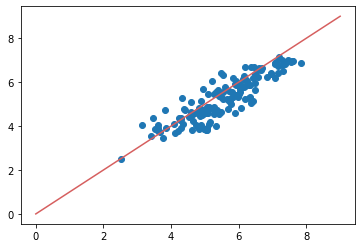

In [127]:
plt.scatter(x=y_test,y=pred)
plt.plot([0,9],[0,9],'r-')
plt.show()


y_test와 pred가 어느정도 잘 estimate하고 있음

<BarContainer object of 6 artists>

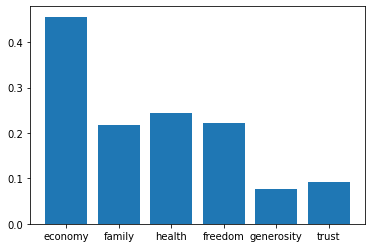

In [128]:
plt.bar(x_train.columns,model_lr.coef_)

요 순서로 중요도가 결정됨

<BarContainer object of 6 artists>

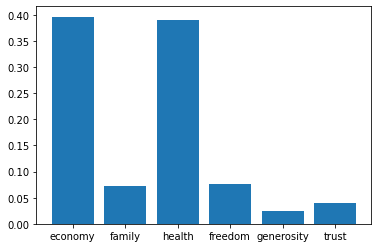

In [129]:
plt.bar(x_train.columns,model_xgb.feature_importances_)